# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [6]:
weather_api_key == "YOUR KEY HERE"

False

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aflu
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | korla
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | oussouye
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,53.19,94,5,1.01,ZA,1690065078
1,albany,42.6001,-73.9662,81.01,49,1,9.04,US,1690064866
2,husavik,66.0449,-17.3389,47.86,82,84,2.64,IS,1690065079
3,victoria,22.2855,114.1577,85.32,87,51,4.65,HK,1690065010
4,coquimbo,-29.9533,-71.3436,58.73,94,75,8.05,CL,1690064938


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,53.19,94,5,1.01,ZA,1690065078
1,albany,42.6001,-73.9662,81.01,49,1,9.04,US,1690064866
2,husavik,66.0449,-17.3389,47.86,82,84,2.64,IS,1690065079
3,victoria,22.2855,114.1577,85.32,87,51,4.65,HK,1690065010
4,coquimbo,-29.9533,-71.3436,58.73,94,75,8.05,CL,1690064938


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

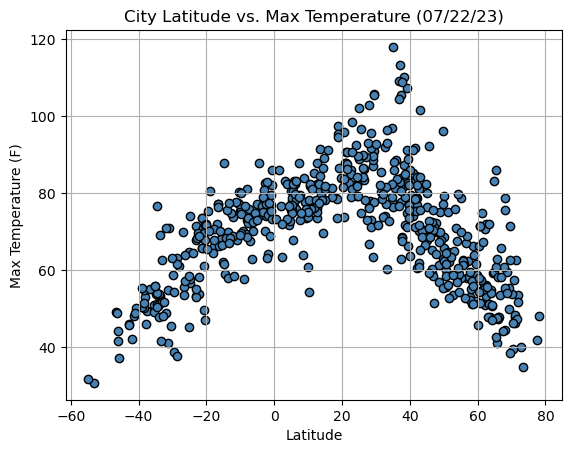

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True) 


# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

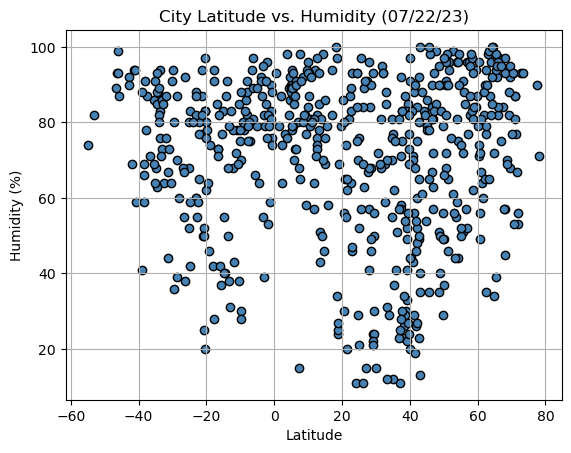

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

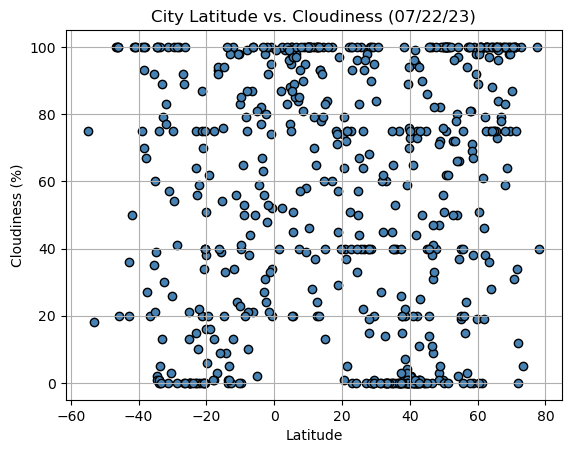

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

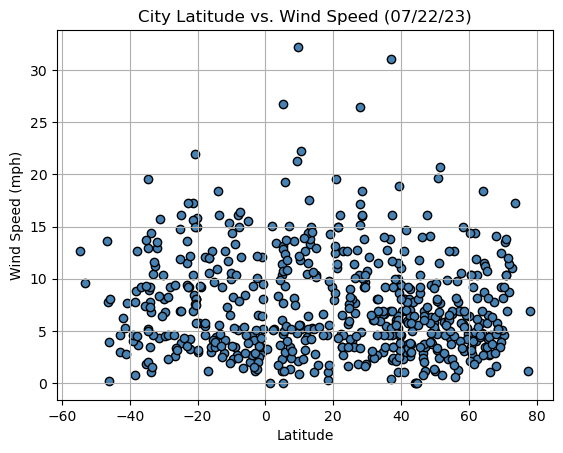

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

         # scatter plot and plot the line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
    
        #calculate position for the text in the graph
        x_text = x_values.min() + 10
        y_text = y_values.min() + 5
        plt.annotate(line_eq,(x_text,y_text),fontsize=15,color="red")
    
        # Labeling
        plt.xlabel(x_name)
        plt.ylabel(y_name)

        # Print r square value
        print(f"The r-value is: {r_value}")
    
        # Show plot
        plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,81.01,49,1,9.04,US,1690064866
2,husavik,66.0449,-17.3389,47.86,82,84,2.64,IS,1690065079
3,victoria,22.2855,114.1577,85.32,87,51,4.65,HK,1690065010
5,asau,46.4333,26.4000,65.32,84,0,2.91,RO,1690065079
8,korla,41.7597,86.1469,84.43,26,95,5.95,CN,1690065080


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,53.19,94,5,1.01,ZA,1690065078
4,coquimbo,-29.9533,-71.3436,58.73,94,75,8.05,CL,1690064938
6,bluff,-46.6000,168.3333,49.10,89,100,13.60,NZ,1690065079
7,airai,-8.9266,125.4092,57.83,78,50,3.47,TL,1690065079
13,cape town,-33.9258,18.4232,53.10,86,75,3.44,ZA,1690064846


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6114335099868793


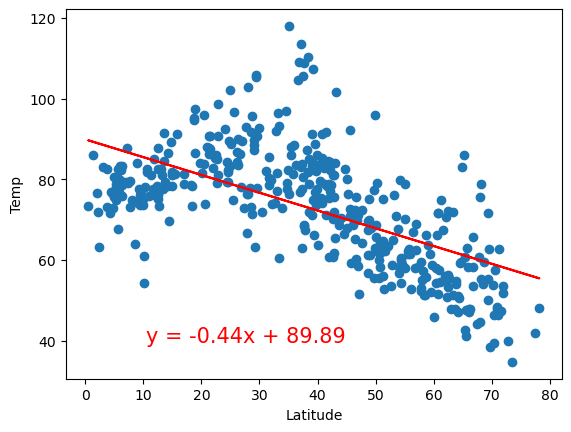

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_name = "Latitude"
y_name = "Temp"

plot_linear_regression(x_values, y_values)

The r-value is: 0.8104923704572105


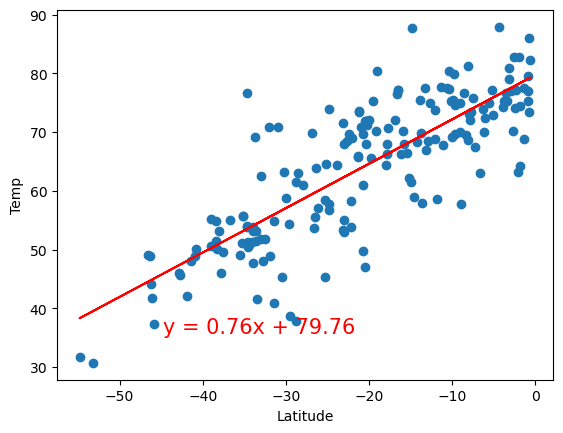

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_name = "Latitude"
y_name = "Temp"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.045572600711828996


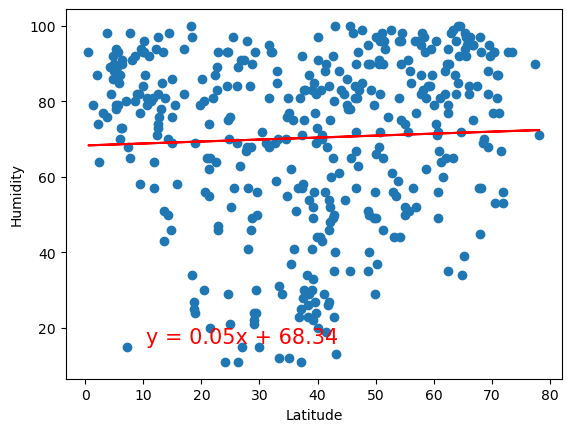

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_name = "Latitude"
y_name = "Humidity"
plot_linear_regression(x_values, y_values)

The r-value is: -0.06324739187935155


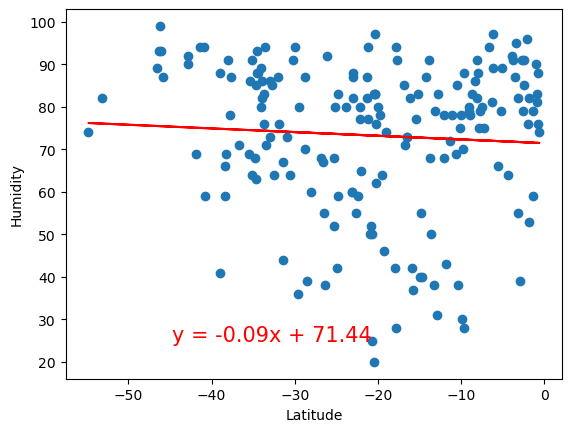

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_name = "Latitude"
y_name = "Humidity"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03428963391978172


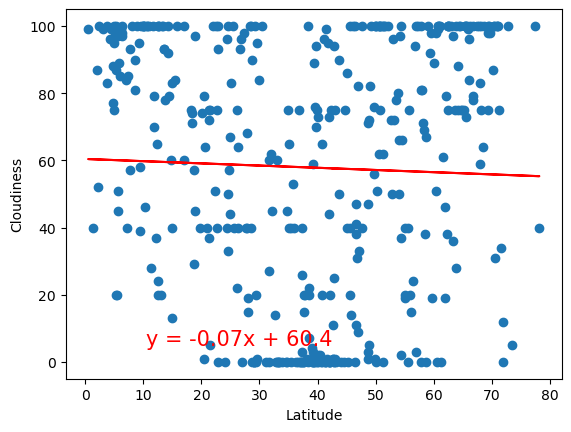

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_name = "Latitude"
y_name = "Cloudiness"
plot_linear_regression(x_values, y_values)

The r-value is: -0.02591951865907807


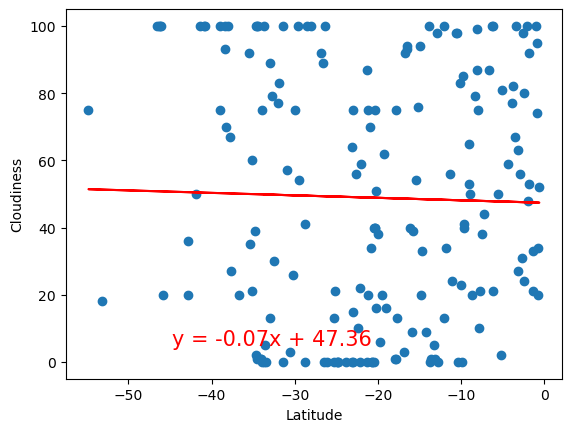

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_name = "Latitude"
y_name = "Cloudiness"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14109816563538988


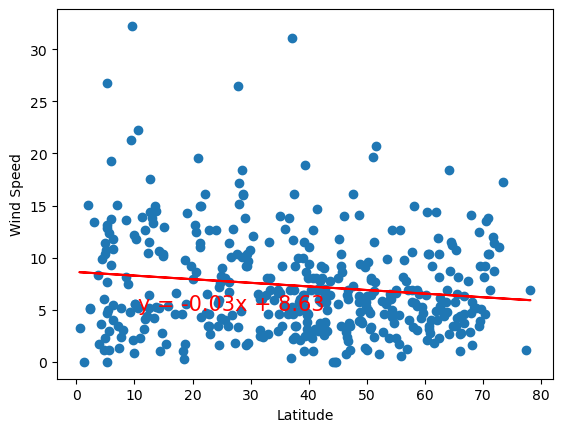

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_name = "Latitude"
y_name = "Wind Speed"
plot_linear_regression(x_values, y_values)

The r-value is: -0.06875642148556314


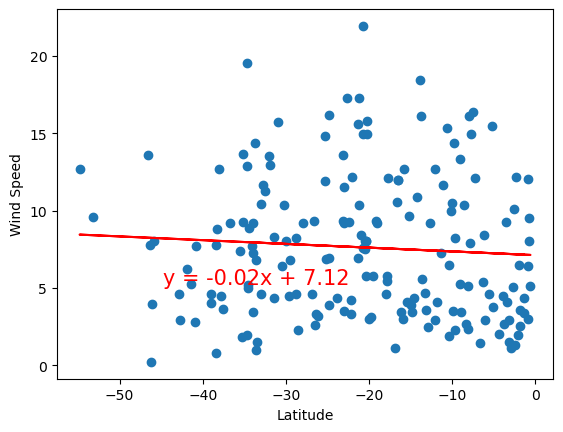

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_name = "Latitude"
y_name = "Wind Speed"
plot_linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#There is very little correlation, but it seems that the northern hemisphere is slightly windier closer to the equator and the southern hemisphere is slightly windier further away from the equator.

 